# Road Accident Analysis in India

In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv("accident.csv")


In [2]:
df=pd.DataFrame(data)

In [3]:
df.head()

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
0,1001,Andhra Pradesh,2021-05-01,15:30:00,Speeding,2,3,Rural,Sunny,No,No,Poor,60.0
1,1002,Karnataka,2021-05-02,18:45:00,Drunk Driving,1,4,Urban,Rainy,Yes,No,Good,40.0
2,1003,Delhi,2021-05-03,10:15:00,Poor Road Conditions,0,2,Urban,Foggy,No,No,Poor,50.0
3,1004,Maharashtra,2021-05-04,06:00:00,Driver Fatigue,3,6,Rural,Sunny,No,Yes,Good,70.0
4,1005,Uttar Pradesh,2021-05-05,21:20:00,Speeding,1,2,Rural,Sunny,No,No,Fair,80.0


In [5]:
df.describe()

,Number_of_Deaths,Speed_Limit
count,300.000000,299.000000
mean,1.766667,56.989967
std,1.090651,13.042390
min,0.000000,30.000000
25%,1.000000,50.000000
50%,2.000000,60.000000
75%,3.000000,60.000000
max,5.000000,90.000000


# Reasons for Road Accidents in India

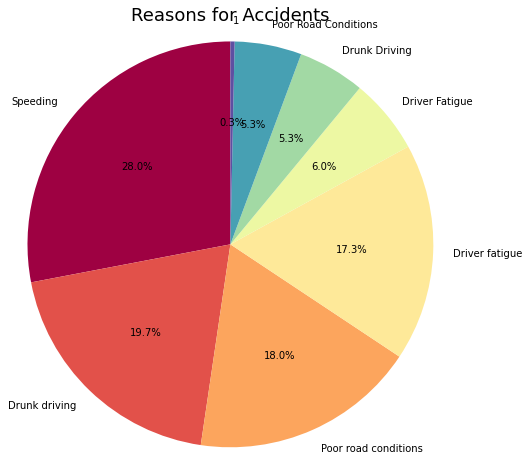

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv file into a pandas dataframe
accidents_df = pd.read_csv('accident.csv')

# Calculate the number of accidents for each reason
reason_counts = accidents_df['Reason'].value_counts()

# Define the colors for the pie chart using spectral color map
colors = plt.cm.Spectral(np.linspace(0, 1, len(reason_counts)))

# Plot the data as a pie chart
plt.figure(figsize=(8,8)) # set the size of the figure
plt.pie(reason_counts, labels=reason_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Reasons for Accidents', fontsize=18)
plt.axis('equal') # make the pie chart circular
plt.show()


# Accident analysis by state

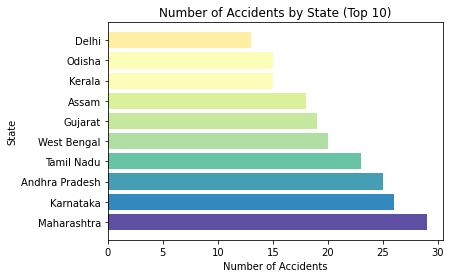

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the dataset
accidents_df = pd.read_csv('accident.csv')

# Group accidents by state and count them
state_accidents = accidents_df.groupby('State')['Accident_ID'].count().reset_index()

# Sort states by the number of accidents
sorted_states = state_accidents.sort_values(by='Accident_ID', ascending=False)

# Display the top 10 states with the most accidents
top_states = sorted_states.head(10)
#print(top_states)

# Define the color map
colors = cm.Spectral(top_states['Accident_ID'] / float(max(top_states['Accident_ID'])))

# Create a horizontal bar graph with spectral color map
plt.barh(top_states['State'], top_states['Accident_ID'], color=colors)
plt.title('Number of Accidents by State (Top 10)')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()


# Impact of  weather conditions on Road Accidents

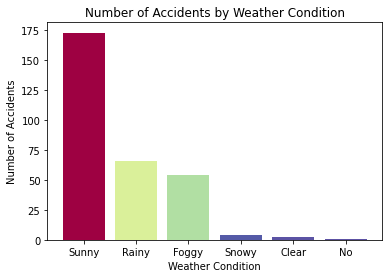

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the dataset
accidents_df = pd.read_csv('accident.csv')

# Group accidents by weather condition and count them
weather_accidents = accidents_df.groupby('Weather_Conditions')['Accident_ID'].count().reset_index()

# Sort weather conditions by the number of accidents
sorted_weather = weather_accidents.sort_values(by='Accident_ID', ascending=False)

# Display the weather conditions with the most accidents
top_weather = sorted_weather.head(10)
#print(top_weather)

# Define spectral color map
colors = cm.Spectral_r(top_weather['Accident_ID']/float(max(top_weather['Accident_ID'])))

# Create a bar graph with spectral color
plt.bar(top_weather['Weather_Conditions'], top_weather['Accident_ID'], color=colors)
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


# Impact of speeding on road accidents 

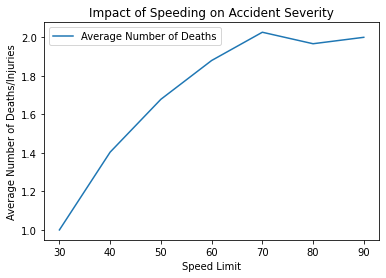

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data into a DataFrame
accidents_df = pd.read_csv('accident.csv', usecols=['Speed_Limit', 'Number_of_Deaths'])

# Group data by speed limit and calculate the average number of deaths and injuries
speed_stats = accidents_df.groupby('Speed_Limit', as_index=False)['Number_of_Deaths'].mean()

# Create a line graph to analyze the relationship between speed limit and average number of deaths and injuries
plt.plot(speed_stats['Speed_Limit'], speed_stats['Number_of_Deaths'], label='Average Number of Deaths')

plt.title('Impact of Speeding on Accident Severity')
plt.xlabel('Speed Limit')
plt.ylabel('Average Number of Deaths/Injuries')
plt.legend()
plt.show()


#  Impact of alcohol consumption on Road accidents 

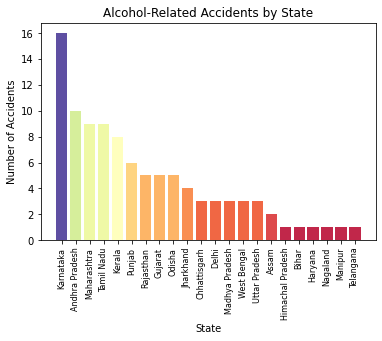

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
accidents_df = pd.read_csv('accident.csv')

# Filter the data to include only accidents with alcohol involvement
alcohol_accidents_df = accidents_df[accidents_df['Alcohol_Involved'] == 'Yes']

# Count the number of alcohol-related accidents in each state
state_counts = alcohol_accidents_df['State'].value_counts()

# Create a bar plot of the state-wise alcohol-related accidents
plt.bar(state_counts.index, state_counts.values, color=plt.cm.Spectral(state_counts.values/max(state_counts.values)))

# Set the title and axis labels
plt.title('Alcohol-Related Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Rotate the x-tick labels and adjust font size
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()


# Analysis of the impact of rural vs. urban locations on accidents

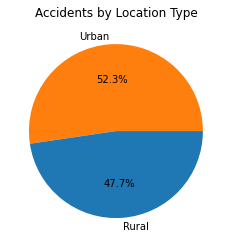

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
accidents_df = pd.read_csv('accident.csv')

# Create a new column to classify the accidents as rural or urban based on the road type
accidents_df['Location_Type'] = accidents_df['Road_Type'].apply(lambda x: 'Rural' if x.startswith('R') else 'Urban')

# Count the number of accidents by location type
location_counts = accidents_df['Location_Type'].value_counts()

colors = ['#ff7f0e', '#1f77b4']


plt.pie(location_counts.values, labels=location_counts.index, colors=colors, autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Accidents by Location Type')

# Display the plot
plt.show()


#  Sending SMS Alert to Family Members 

In [4]:
# Download the helper library from https://www.twilio.com/docs/python/install
import os
import secrets
import time
from twilio.rest import Client

# Set environment variables for your credentials
# Read more at http://twil.io/secure
account_sid = "AC00709cd49b7b8b39ff08b38420b6508a"
auth_token = "6f4b2d849b1a7787da5b687fe17e66bb"
client = Client(account_sid, auth_token)

# Define the phone numbers
from_number = "+16205071602"
to_number = "+919492333588"

# Get the user input for alcohol consumption
alcohol_input = input("Have you consumed alcohol? (yes/no) ").lower()
if alcohol_input == "yes":
    alcohol_detected = True
else:
    alcohol_detected = False
    # Generate a secure random key with a given length
    def generate_key(length):
        return secrets.token_hex(length//2)
    # Generate a captcha and return the key
    def generate_captcha():
        # Generate a 6-character captcha
        captcha = generate_key(6)
        print(f"Captcha: {captcha}")
        return captcha
    # Check if the user's answer matches the key
    def check_answer(answer, key):
        return answer == key

    # Set the number of allowed attempts
    max_attempts = 3
    attempts = 0
    while attempts < max_attempts:
        # Generate a captcha and prompt the user to enter an answer
        captcha_key = generate_captcha()
        user_answer = input("Enter the captcha: ")
        
        # Check if the user's answer matches the key
        if check_answer(user_answer, captcha_key):
            print("Success! Captcha matches the key.")
            break
        else:
            attempts += 1
            if attempts == max_attempts:
                print("Error! Three wrong attempts, driver has consumed alcohol.")
                alcohol_detected = True
            else:
                print(f"Error! Captcha does not match the key. {max_attempts - attempts} attempts remaining.")

# Get the user input for speed
speed_input = input("Enter your current speed (km/h): ")
speed = int(speed_input)

# Check if speed is above the limit and alcohol is detected
if speed > 100 :
    # Construct the message to be sent
    message_body = f"Your Companion is overspeeding and Speed is {speed_input} km/h."
    
    # Send the message
    message = client.messages.create(
        body=message_body,
        from_=from_number,
        to=to_number
    )
    print("You are overspeeding, Message sent to your registered mobile number. ")
if alcohol_detected:
    # Construct the message to be sent
    message_body = f"Your Companion has consumed alcohol and is trying to drive the car. Please send emergency services."
    
    # Send the message
    message = client.messages.create(
        body=message_body,
        from_=from_number,
        to=to_number
    )
    print("You have consumed alcohol , Message sent to your registered mobile number. ")
if speed > 100 and alcohol_detected:
    # Construct the message to be sent
    message_body = f"Your Companion is overspeeding and Speed is {speed_input} km/h and has consumed alcohol. Please send emergency services."
    
    # Send the message
    message = client.messages.create(
        body=message_body,
        from_=from_number,
        to=to_number
    )
    # Print the message SID for confirmation
    print("You have consumed alcohol and also overspeedning, Message sent to your registered mobile number. ")
    print("Message SID:", message.sid)
else:
    print("You are driving safely")

Have you consumed alcohol? (yes/no) no
Captcha: 5b466f
Enter the captcha: 5b283
Error! Captcha does not match the key. 2 attempts remaining.
Captcha: 5a7d12
Enter the captcha: 5a52d
Error! Captcha does not match the key. 1 attempts remaining.
Captcha: 167ab5
Enter the captcha: 134s
Error! Three wrong attempts, driver has consumed alcohol.
Enter your current speed (km/h): 10
You have consumed alcohol , Message sent to your registered mobile number. 
You are driving safely
